In [244]:
import gym
import gym_maze
import time
import random
import numpy
import matplotlib.pyplot as plt

In [245]:
N = 0
E = 1
S = 2
W = 3

In [246]:
SIZE = 10

In [247]:
def draw_values(data, cell_width=1, cell_height=1):
    # Prepare data for plotting
    values = [data.get(i, 0) for i in range(100)]

    grid_values = [values[i:i+10] for i in range(0, len(values), 10)]

    # Calculate the total size of the figure
    fig_width = 10 * cell_width
    fig_height = 10 * cell_height

    # Create the plot with specified figure size
    plt.figure(figsize=(fig_width, fig_height))
    plt.imshow(grid_values, cmap='viridis', interpolation='nearest')

    # Add text annotations with values formatted to 3 decimal places
    for i in range(10):
        for j in range(10):
            plt.text(j, i, '{:.3f}'.format(grid_values[i][j]), ha='center', va='center', color='black')

    # Customize plot aesthetics
    plt.title('Grid Visualization')
    plt.colorbar(label='Values')
    plt.xticks(range(10), range(10))
    plt.yticks(range(10), range(10))
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.grid(visible=False)
    plt.show()

In [248]:
def draw_grid(directions, no_arrow_positions = []):
    rows = 10
    columns = 10
    cell_size = 1

    fig, ax = plt.subplots()

    for row in range(rows):
        for col in range(columns):
            index = row * columns + col
            direction = directions.get(index, None)

            if direction is not None and index not in no_arrow_positions:
                x = col * cell_size + cell_size / 2
                y = (rows - 1 - row) * cell_size + cell_size / 2

                if direction == 0:  # Upward arrow
                    ax.arrow(x, y, 0, cell_size / 4, head_width=0.2, head_length=0.2, fc='black', ec='black')
                elif direction == 2:  # Right arrow
                    ax.arrow(x, y, cell_size / 4, 0, head_width=0.2, head_length=0.2, fc='black', ec='black')
                elif direction == 1:  # Downward arrow
                    ax.arrow(x, y, 0, -cell_size / 4, head_width=0.2, head_length=0.2, fc='black', ec='black')
                elif direction == 3:  # Left arrow
                    ax.arrow(x, y, -cell_size / 4, 0, head_width=0.2, head_length=0.2, fc='black', ec='black')
            elif index in no_arrow_positions:
                c = 'black'
                if index == 47:
                    c = 'green'
                    
                ax.add_patch(plt.Rectangle((col, rows - 1 - row), 1, 1, color=c))

    ax.set_aspect('equal')
    ax.set_xlim(0, columns)
    ax.set_ylim(0, rows)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

In [249]:
def map_state(state):
    return state[1] * ROW + state[0] 

In [250]:
def get_col_row(state):
    return (state % COLUMN, state // COLUMN)

In [251]:
def get_deterministic_state(state, action):
    c, r = get_col_row(state)
    if action == N:
        if r == 0:
            return state
        return state - COLUMN

    if action == E:
        if c == SIZE - 1:
            return state
        return state + 1

    if action == S:
        if r == SIZE - 1:
            return state
        return state + COLUMN

    if action == W:
        if c == 0:
            return state
        return state - 1

In [252]:
def select_action(Q, s, epsilon = 1):
    if(random.random() < epsilon):
        return random.randint(0, 3)
    else:
        action = 0
        for i in range(4):
            if Q[s][i] > Q[s][action]:
                action = i

        return action

In [253]:
# # Create an environment
# env = gym.make("maze-random-10x10-plus-v0")
# observation = env.reset()

# # Gets the size of the maze
# COLUMN, ROW = env.maze_size
# CELLS = COLUMN * ROW

# # Define the maximum number of iterations
# NUM_EPISODES = 500000

# learning_rate = 0.05
# gamma = 0.99
# epsilon = 1

# Q = {}
# for i in range(CELLS):
#     Q[i] = [0 for j in range(4)]

# # Transition Function
# transition = {}

# state = observation
# success = 0
# for episode in range(NUM_EPISODES + 100000):
#     mapped_state = map_state(state)

#     # Updating the transition function
#     if mapped_state not in transition:
#         transition[mapped_state] = {}
    
#     action = select_action(Q, mapped_state, epsilon)

#     if action not in transition[mapped_state]:
#         transition[mapped_state][action] = []

#     # Linear Decay of epsilon
#     epsilon -= (1 / NUM_EPISODES)
             
#     next_state, reward, done, truncated = env.step(action)
#     mapped_next_state = map_state(next_state)

#     if mapped_next_state not in transition[mapped_state][action]:
#         transition[mapped_state][action].append(mapped_next_state)

#     # Calculating sum of prob*Q(sp,a)
#     p_q_val = 0
#     for sp in transition[mapped_state][action]:
#         if get_deterministic_state(mapped_state, action) == sp:
#             prob = 0.6
#         else:
#             prob = 0.2
#         p_q_val += prob * max(Q[sp])
    
#     Q[mapped_state][action] += learning_rate * (reward + gamma * p_q_val - Q[mapped_state][action])
#     # cnt += 1

#     state = next_state
    
#     if episode > NUM_EPISODES and mapped_next_state == CELLS - 1:
#         success += 1
#         print(episode)

#     if done or truncated:
#         observation = env.reset()
#         state = observation
        
# env.close();

In [255]:
env = gym.make("maze-random-10x10-plus-v0")
observation = env.reset()

# Gets the size of the maze
COLUMN, ROW = env.maze_size
CELLS = COLUMN * ROW

# Define the maximum number of iterations
NUM_TRAIN_STEP = 1000000
NUM_TEST_STEP = 100000

learning_rate = 0.09
gamma = 0.99
epsilon = 1

Q = {}
for i in range(CELLS):
    Q[i] = [0 for j in range(4)]

state = observation
success = 0
EPISODE = 0

for episode in range(NUM_TRAIN_STEP + NUM_TEST_STEP):
    mapped_state = map_state(state)

    action = select_action(Q, mapped_state, epsilon)
    
    # Linear Decay of epsilon
    epsilon -= (1 / NUM_TRAIN_STEP)

    next_state, reward, done, truncated = env.step(action)
    mapped_next_state = map_state(next_state)

    Q[mapped_state][action] += learning_rate * (reward + gamma * max(Q[mapped_next_state]) - Q[mapped_state][action])
    
    if(episode > NUM_TRAIN_STEP and mapped_next_state == CELLS - 1):
        success += 1

    state = next_state

    if done or truncated:
        if episode > NUM_TRAIN_STEP:
            EPISODE += 1
        observation = env.reset()
        state = observation
    
env.render()
env.close()

In [256]:
print(f"{EPISODE}=")
print(f"RATE WIN = {success / EPISODE * 100} ")
print(f"AVG STEP for Win = {NUM_TEST_STEP / success}")

3947=
RATE WIN = 100.0 
AVG STEP for Win = 25.33569799847986


In [257]:
pi = {}
V = {}

for state in range(100):
    mx = 0
    for i in range(4):
        if(Q[state][i] > Q[state][mx]):
            mx = i
            
    pi[state] = mx
    V[state] = Q[state][mx]

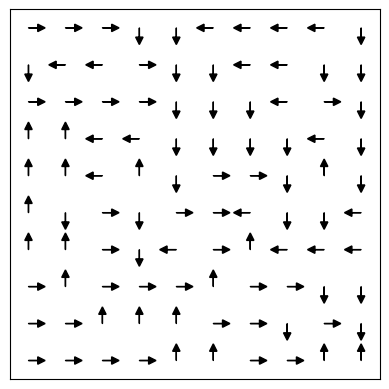

In [258]:
draw_grid(pi)

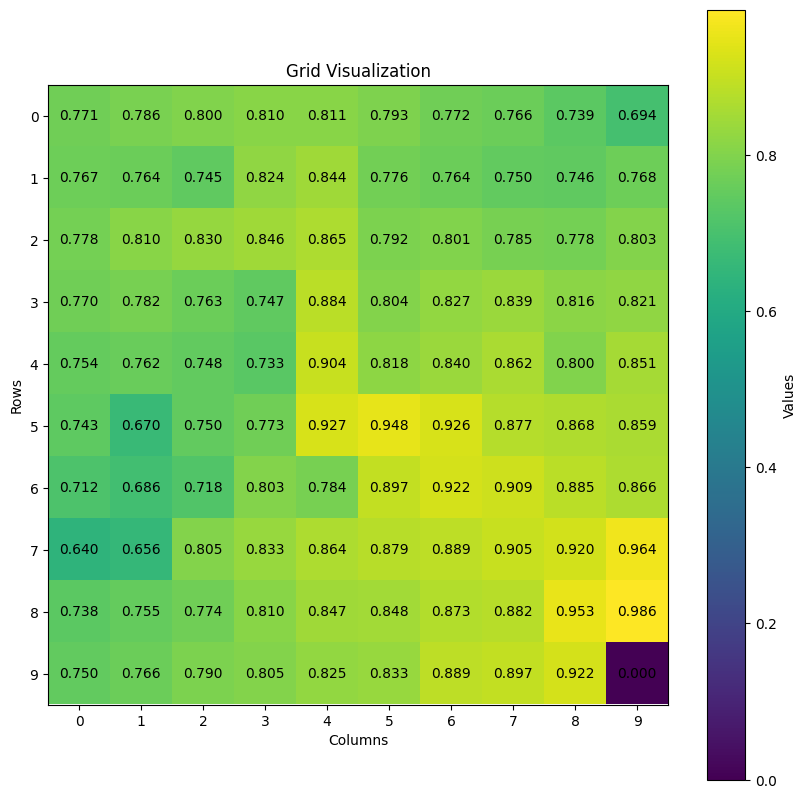

In [259]:
draw_values(V)

In [ ]:
Q